In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
data_set = pd.read_csv("../../datasets/Magic_telescope/telescope_data.csv")
data_set

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
data_set.pop("Unnamed: 0")
data_set

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
data_set['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
data_set['class'] = (data_set['class'] == 'g').astype(int)
data_set

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


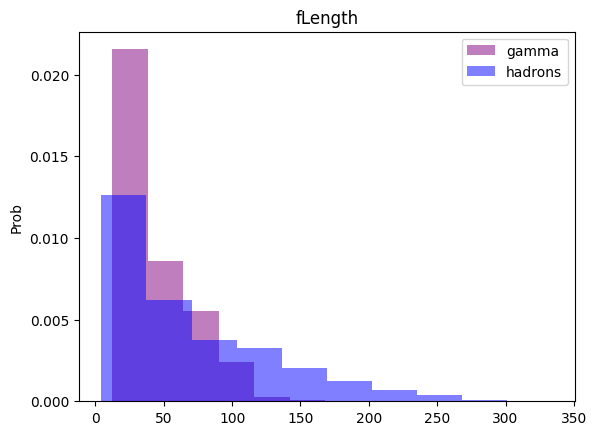

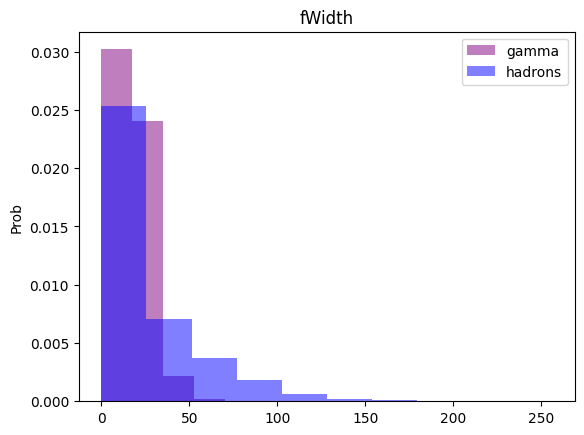

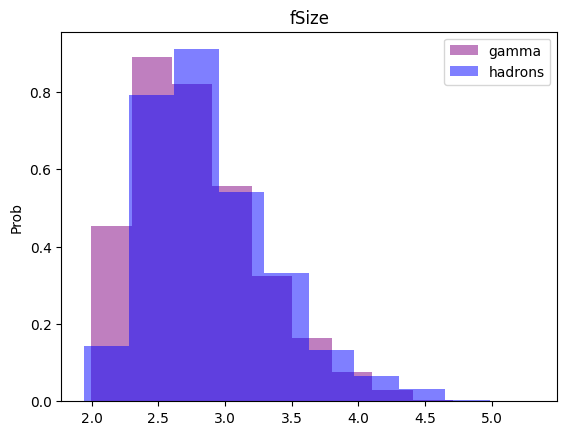

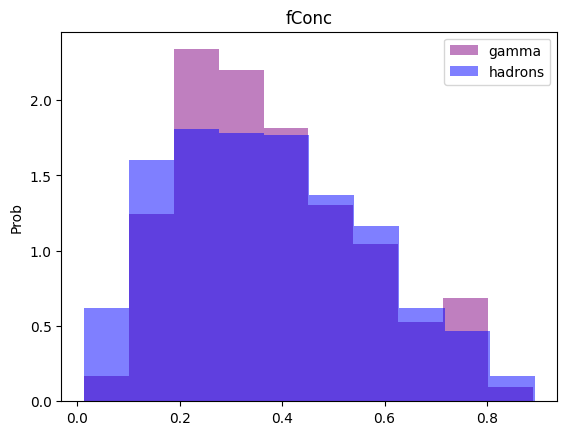

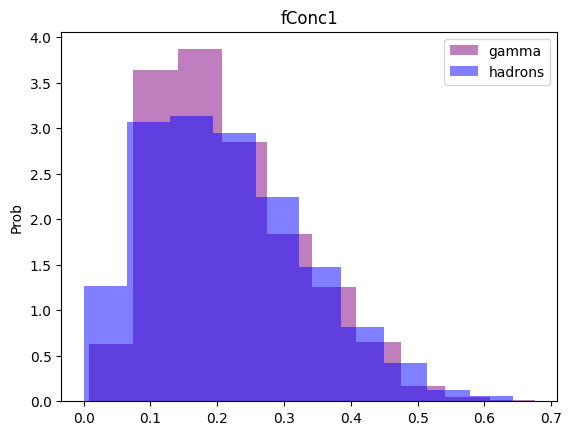

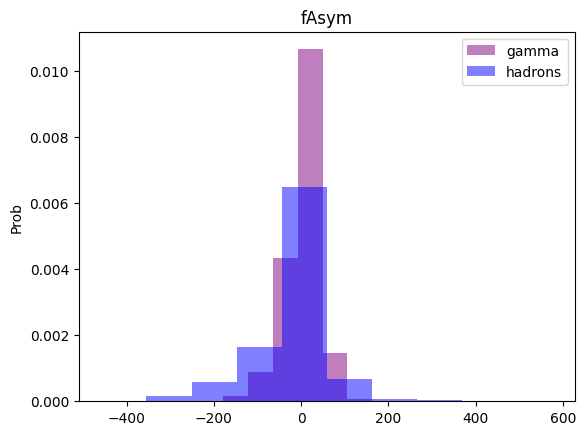

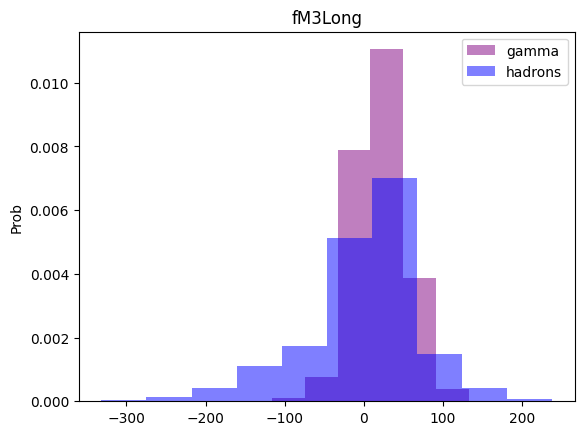

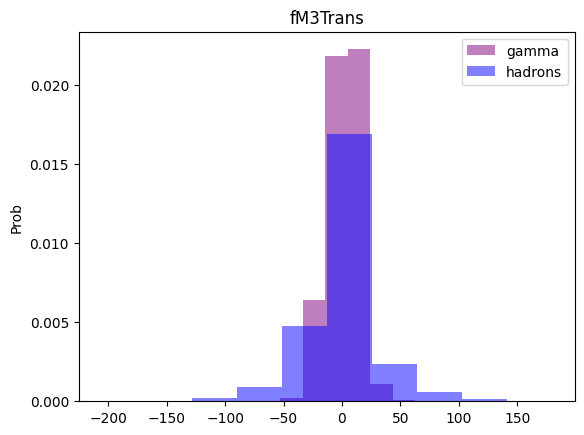

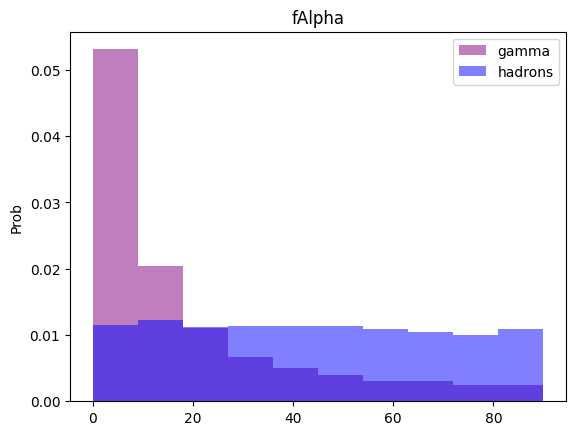

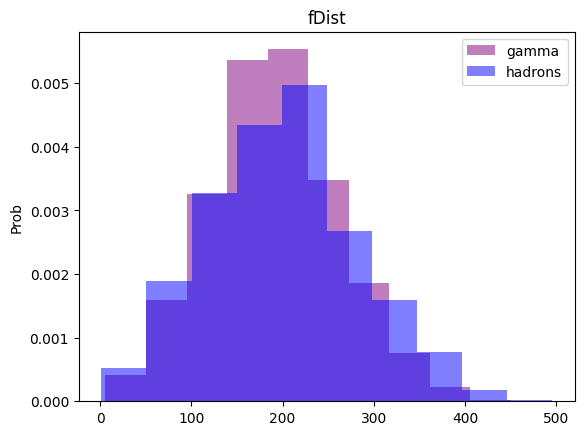

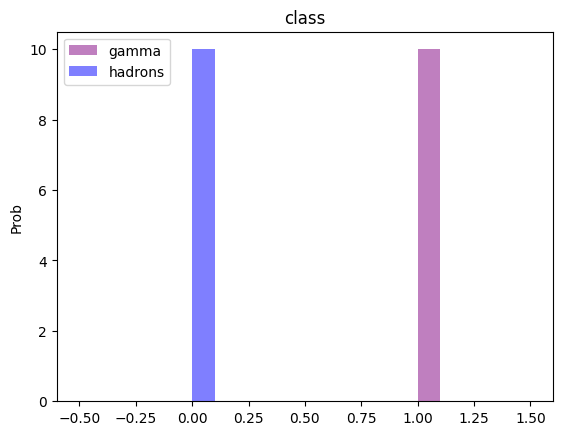

In [6]:
for label in data_set.columns:
    plt.hist(data_set[data_set['class']==1][label], color='purple', label='gamma', alpha=0.5, density=True)
    plt.hist(data_set[data_set['class']==0][label], color='blue', label='hadrons', alpha=0.5, density=True)
    plt.title(label)
    plt.ylabel("Prob")
    plt.legend()
    plt.show()

In [7]:
# Create the train, validation and test data set:
train, validation, test = np.split(data_set.sample(frac=1), [int(0.6*len(data_set)), int(0.8*len(data_set))])
# Primeiro parametro vai embaralhar o data set, pegando ele inteiro, pois a frac = 1
# Segundo parâmetro informa onde você quer dividir o data set (No caso, dividir ele a partir de 60% dele), sendo isso o training data
# O Terceiro pega a partir de 60% para 80%, sendo o validation data
# O resto fica para o test data (10%)

In [8]:
def scale_dataset(dataset, oversample=False):
    x = dataset[dataset.columns[:-1]].values
    y = dataset[dataset.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    # hstack junta dois arrays horizontalmente, fazendo uma matriz
    # Como x é uma matriz e y um vetor, chamou o reshape para transformar y em uma matriz

    if (oversample):
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y) 
    
    return data, x, y
    

In [9]:
train
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))
# Perceba que a quantidade de gammas e hadrons está bem dispersa no training data, o ideal é aproximá-las

7407
4005


In [10]:
train, x_train, y_train = scale_dataset(train, oversample=True)

In [11]:
# print(len(train[train['class']==1]))
# print(len(train[train['class']==0]))
print(len(y_train==1))
print(len(y_train==0))
# Quantidade iguais agora devido ao oversample colocado na função

14814
14814


In [12]:
validation, x_validation, y_validation = scale_dataset(validation, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

Using KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
predictions = knn_model.predict(x_test)

In [16]:
for predicted, trues in zip(predictions, y_test):
    print(f"Predicted: {predicted} | True value: {trues}")

Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 0
Predicted: 1 | True value: 0
Predicted: 1 | True value: 0
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 0 | True value: 1
Predicted: 1 | True value: 0
Predicted: 0 | True value: 0
Predicted: 0 | True value: 0
Predicted: 1 | True value: 1
Predicted: 0 | True value: 0
Predicted: 1 | True value: 1
Predicted: 1 | True value: 0
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 0 | True value: 0
Predicted: 1 | True value: 0
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 | True value: 1
Predicted: 1 |

In [17]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1325
           1       0.86      0.85      0.85      2479

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [20]:
predictions = nb_model.predict(x_test)

In [21]:
for predicted, real in zip(predictions, y_test):
    print(f"Predicted: {predicted} | Real: {real}")

Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 1 | Real: 0
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 1
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 

In [22]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.41      0.68      0.51       810
           1       0.89      0.73      0.80      2994

    accuracy                           0.72      3804
   macro avg       0.65      0.71      0.66      3804
weighted avg       0.79      0.72      0.74      3804



In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
predictions = lr_model.predict(x_test)
for predicted, real in zip(predictions, y_test):
    print(f"Predicted: {predicted} | Real: {real}")

Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 0
Predicted: 0 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1359
           1       0.84      0.83      0.83      2445

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [30]:
predictions = svm_model.predict(x_test)
for predicted, real in zip(predictions, y_test):
    print(f"Predicted: {predicted} | Real: {real}")

Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 1
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 1 | Real: 0
Predicted: 0 | Real: 0
Predicted: 1 | Real: 1
Predicted: 0 | Real: 0
Predicted: 

In [31]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1317
           1       0.90      0.88      0.89      2487

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

